In [1]:
# Imports
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Craindo o dataframe do arquivo *.csv
df = pd.read_csv('baseball.csv')
# Fazendo a leitura das 5 primeiras linhas
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


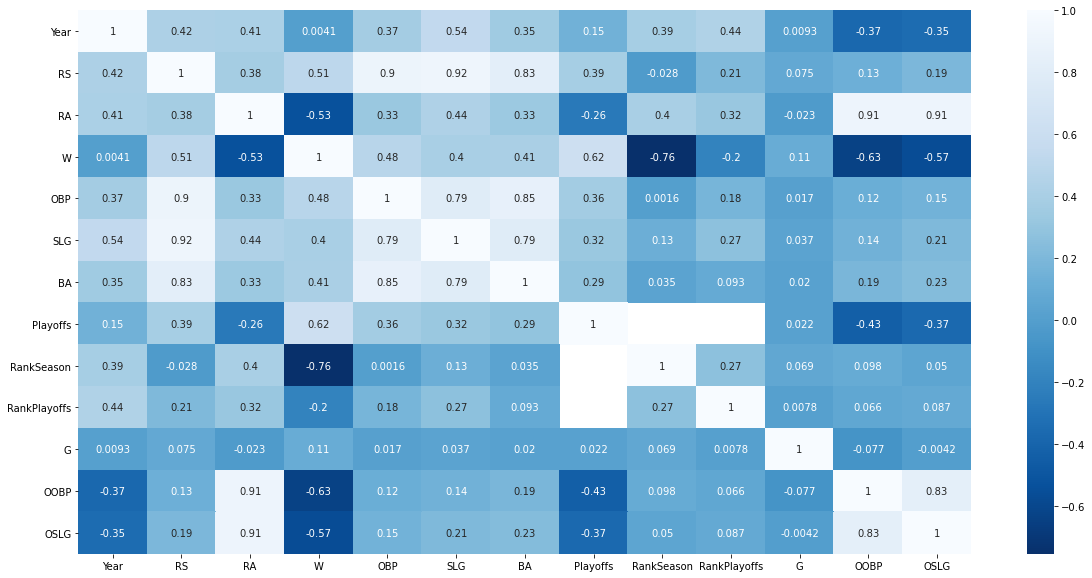

In [3]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues_r');

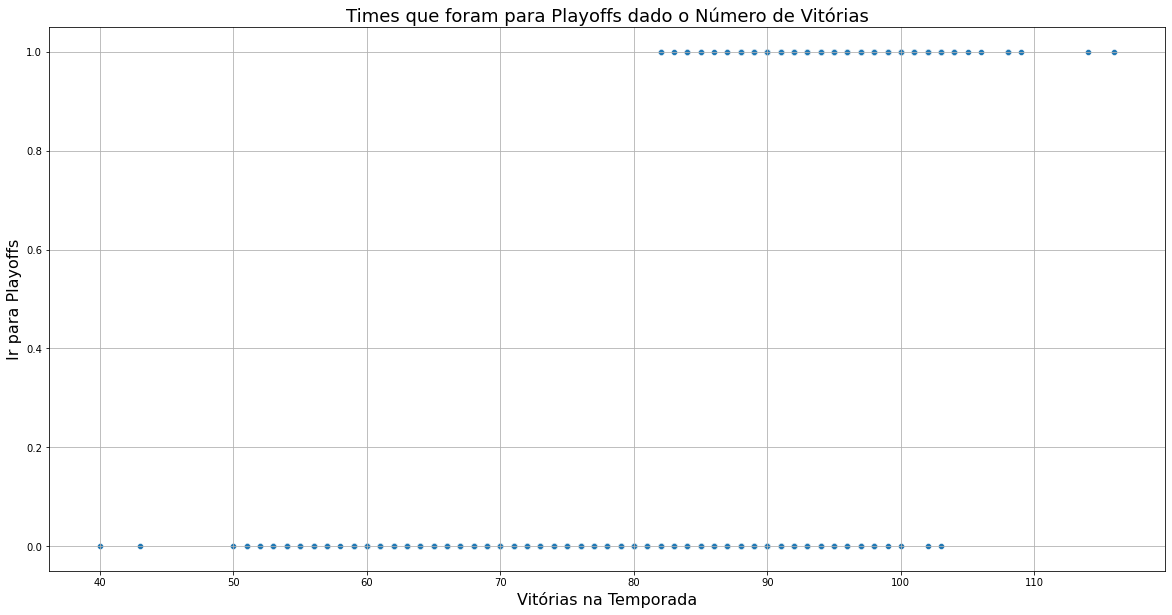

In [4]:
# Gráfico dado o evento de ir ou não para playoffs dado o número de vitórias
plt.figure(figsize=(20, 10))
sns.scatterplot(x='W', y='Playoffs', data=df)
plt.title('Times que foram para Playoffs dado o Número de Vitórias', fontsize=18)
plt.ylabel('Ir para Playoffs', fontsize=16)
plt.xlabel('Vitórias na Temporada', fontsize=16)
plt.grid()
plt.show()

In [5]:
# Separando as variaveis explicativas
X = df.drop(['League','Year', 'Team', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG', 'Playoffs'], axis=1)
# Separando as variaveis dependentes
y = df.Playoffs

In [6]:
# Separando o dataframe em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [7]:
# Criando o modelo
clf = LogisticRegression(random_state=1)
print("------------------------------ Treinando Modelo ------------------------------")
# Treinando o modelo
clf.fit(X_train, y_train)
print("------------------------------- Modelo treinado ------------------------------")
# Prevendo as probabilidades do modelo
clf.predict_proba(X_test)
print("--------------------------- Probablidades definidas --------------------------")

------------------------------ Treinando Modelo ------------------------------
------------------------------- Modelo treinado ------------------------------
--------------------------- Probablidades definidas --------------------------


In [8]:
# Criando lista com os valores de probabilidade
prob = [clf.predict_proba(X_test)[i][1] for i in range(0, len(clf.predict_proba(X_test)))]
# Criando lista com os valores arredondados e em %
prob = [round(i*100, 2) for i in prob]

In [9]:
# Inserindo Y no mesmo df com X, Team como identificador
result = pd.concat([X_test.copy(), y_test, df.Team], axis=1, join='inner').set_index('Team')
result['prob_pct'] = prob
result.sample(10)

,RS,RA,W,OBP,SLG,BA,Playoffs,prob_pct
Team,,,,,,,,
MON,741,720,91,0.328,0.401,0.265,0,45.59
WSN,710,874,59,0.337,0.406,0.258,0,0.00
DET,743,745,86,0.331,0.416,0.260,0,10.89
CIN,783,853,72,0.335,0.436,0.267,0,0.07
NYM,609,723,65,0.305,0.350,0.247,0,0.00
CHC,614,655,77,0.320,0.357,0.247,0,0.18
MIL,740,826,73,0.325,0.403,0.246,0,0.08
OAK,884,645,102,0.345,0.439,0.264,1,98.73
KCA,615,704,73,0.313,0.353,0.247,0,0.04


In [10]:
# Inserindo os labels originais de playoffs, id como identificador
result_id = X_test.copy()
playoffs = [df.Playoffs.iloc[i] for i in result_id.index]
result_id['Playoffs'] = playoffs
result_id['prob_pct'] = prob
result_id.sample(10)

,RS,RA,W,OBP,SLG,BA,Playoffs,prob_pct
131,712,743,86,0.323,0.415,0.263,0,10.12
325,783,616,95,0.344,0.442,0.267,1,76.79
463,742,645,88,0.330,0.418,0.268,0,16.39
899,719,653,97,0.329,0.393,0.261,0,87.71
548,648,581,87,0.313,0.370,0.252,0,7.77
348,642,713,82,0.323,0.387,0.249,0,1.69
845,624,762,67,0.309,0.383,0.251,0,0.00
231,680,769,67,0.322,0.400,0.259,0,0.01
386,887,771,95,0.356,0.455,0.270,1,87.65
27,808,707,93,0.334,0.446,0.273,1,67.93


In [11]:
# Coeficiente Linear (alpha)
clf.intercept_

array([-41.03495147])

In [12]:
# Coeficientes Angulares (betas)
clf.coef_

array([[ 0.00239475,  0.00330259,  0.40282626,  0.07098502,  0.09618981,
        -0.05087856]])

In [13]:
# Exibindo a função f(x) que explica o comportamento do fenômeno
print('Z = {} + {} * RS + {} * RA + {} * W + {} * OBP + {} * SLG + {} * BA'
    .format(clf.intercept_[0],
            clf.coef_[0][0],
            clf.coef_[0][1], 
            clf.coef_[0][2], 
            clf.coef_[0][3], 
            clf.coef_[0][4], 
            clf.coef_[0][5]))

Z = -41.03495146954513 + 0.0023947536865799248 * RS + 0.0033025858146347414 * RA + 0.40282626293877405 * W + 0.07098501557540192 * OBP + 0.0961898140909577 * SLG + -0.050878556782241215 * BA


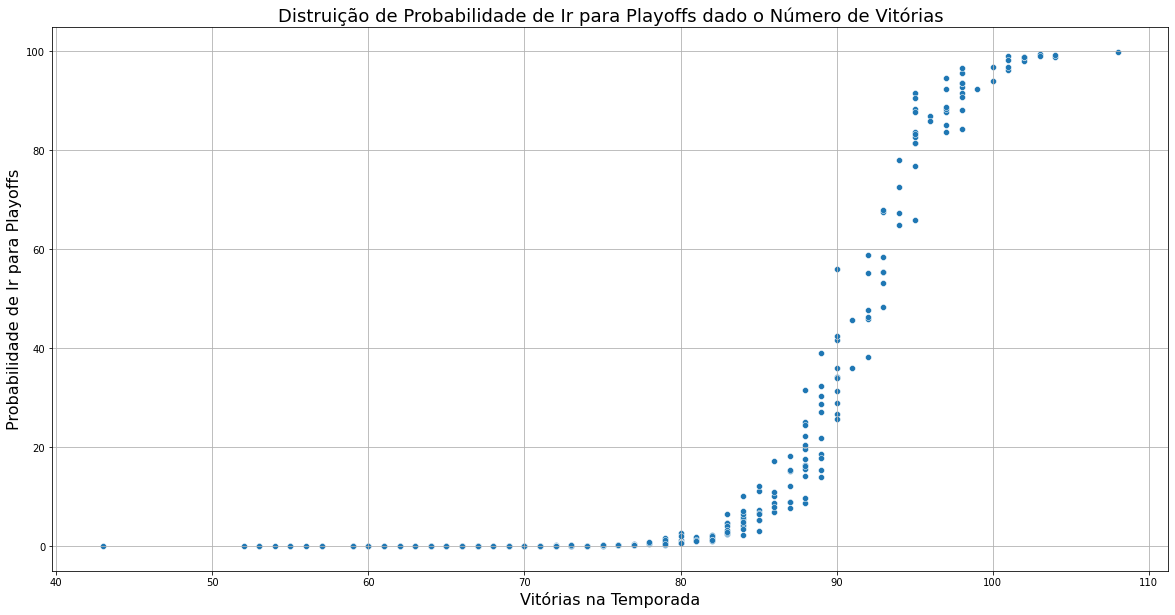

In [14]:
# Gráfico da probabilidade ir ou não para playoffs dado o número de vitórias
plt.figure(figsize=(20, 10))
sns.scatterplot(x='W', y='prob_pct', data=result)
plt.title('Distruição de Probabilidade de Ir para Playoffs dado o Número de Vitórias', fontsize=18)
plt.ylabel('Probabilidade de Ir para Playoffs', fontsize=16)
plt.xlabel('Vitórias na Temporada', fontsize=16)
plt.grid()
plt.show()

In [15]:
# Criando uma função para dados valores de entrada estimar a probabilidade de Playoffs de um time:
def prob_playoffs(RS: int, RA: int, W: int, OBP: float, SLG: float, BA: float):
    prob = round((clf.predict_proba([[RS, RA, W, OBP, SLG, BA]])[0][1]) * 100, 2)
    return print("A probabilidade desse time chegar em Playoffs é de {}%" .format(prob))
    

In [16]:

prob_playoffs(943, 599, 89, 0.312, 0.385, 0.257)

A probabilidade desse time chegar em Playoffs é de 28.89%
